In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Name of the CSV file
file = '../ignore/US_Accidents_May19.csv'
df = pd.read_csv(file)

#Source: https://www.fhwa.dot.gov/policyinformation/statistics/2017/
dl_file = '../ignore/US_DLCount.csv'
df_dlbystate = pd.read_csv(dl_file, thousands=',')

In [41]:
df.head()
df_dlbystate.head()
# df.count()

,STATE,2015,2016,2017
0,Alabama,3907038,3943082,3954378
1,Alaska 2/,533227,534585,534585
2,Arizona,4978762,5082305,5164966
3,Arkansas,2119578,2391103,2417464
4,California,25532920,26199436,26777132


In [43]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

dfcl_dlbystate = df_dlbystate.replace({"Alaska 2/": "Alaska",
                                       "Hawaii 2/": "Hawaii",
                                       "Dist. of Col.": "District of Columbia"
                                      })
state_list = dfcl_dlbystate["STATE"].str.strip()
dfcl_dlbystate["STATE"] = state_list
dfcl_dlbystate = dfcl_dlbystate.replace({"STATE": us_state_abbrev})
dfcl_dlbystate.head()

,STATE,2015,2016,2017
0,AL,3907038,3943082,3954378
1,AK,533227,534585,534585
2,AZ,4978762,5082305,5164966
3,AR,2119578,2391103,2417464
4,CA,25532920,26199436,26777132


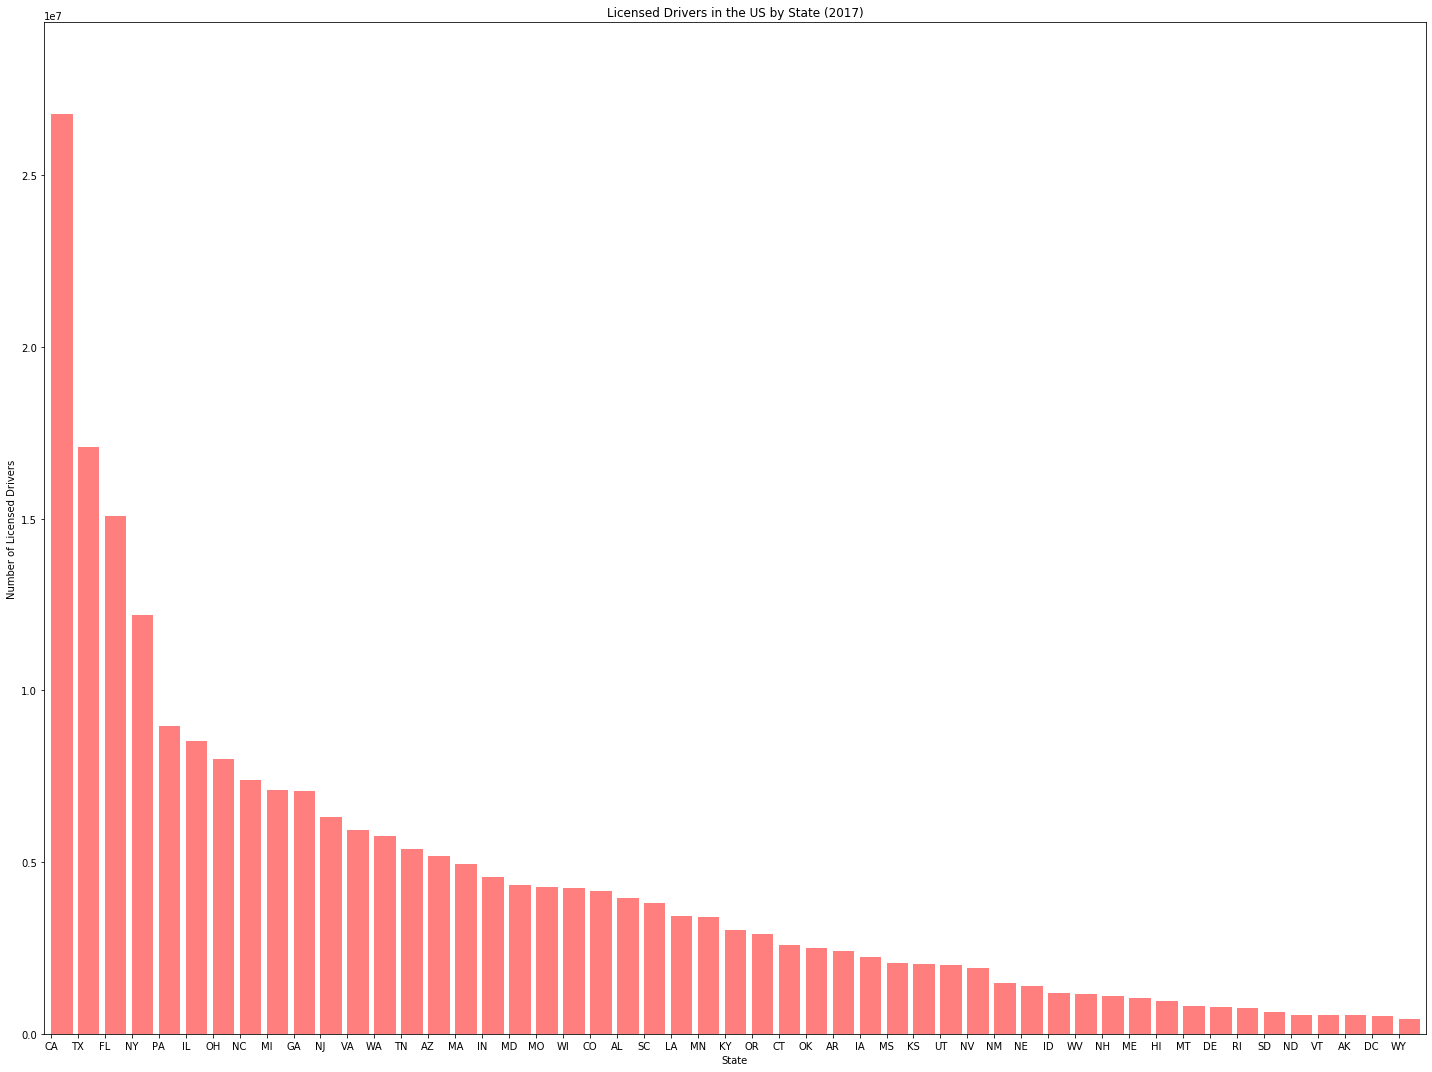

In [83]:
dl_2017 = dfcl_dlbystate[["STATE", "2017"]].sort_values("2017", ascending = False)
dl_2017 = dl_2017.reset_index(drop= True)

#drop the total row
dl_2017 = dl_2017.drop(0)

x_axis = np.arange(len(dl_2017["STATE"]))

# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(20,15))
plt.bar(x_axis, dl_2017["2017"], color='r', alpha=0.5, align="edge")
plt.xticks(x_axis, dl_2017["STATE"])

# Set x and y limits
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max( dl_2017["2017"])*1.1)

# # Set a Title and labels
plt.title("Licensed Drivers in the US by State (2017)")
plt.xlabel("State")
plt.ylabel("Number of Licensed Drivers")

# # Save our graph and show the graph
plt.tight_layout()
plt.savefig("Outputs/2017_DL_byState.png")
plt.show()

###Add labels, fix y-ticks and ticklabels

In [84]:
#Create Relevant DataFrame
df_location = df[["ID", "Severity", "Start_Time", 
#                   "End_Time",  "Distance(mi)",
                  "City", "County", "State", "Timezone"]]
df_location.head()
# df_location.count()
#Recategorize the timestamp - year, month, time categories
df_location["Start_Year"] = df_location["Start_Time"].agg(lambda x: x.split("-")[0])
df_location["Start_Month"] = df_location["Start_Time"].agg(lambda x: x.split("-")[1])
df_location["Start_HrMin"] = df_location["Start_Time"].agg(lambda x: x.split()[1])
df_location["Start_Hr"] = df_location["Start_HrMin"].agg(lambda x: x.split(":")[0])
dfcl_location = df_location [["ID", "Severity", 
                              "Start_Year", "Start_Month", "Start_Hr",
                              "City", "County", "State", "Timezone"]]
dfcl_location.head()

C:\Users\heain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\heain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\heain\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

,ID,Severity,Start_Year,Start_Month,Start_Hr,City,County,State,Timezone
0,A-1,3,2016,02,05,Dayton,Montgomery,OH,US/Eastern
1,A-2,2,2016,02,06,Reynoldsburg,Franklin,OH,US/Eastern
2,A-3,2,2016,02,06,Williamsburg,Clermont,OH,US/Eastern
3,A-4,3,2016,02,07,Dayton,Montgomery,OH,US/Eastern
4,A-5,2,2016,02,07,Dayton,Montgomery,OH,US/Eastern


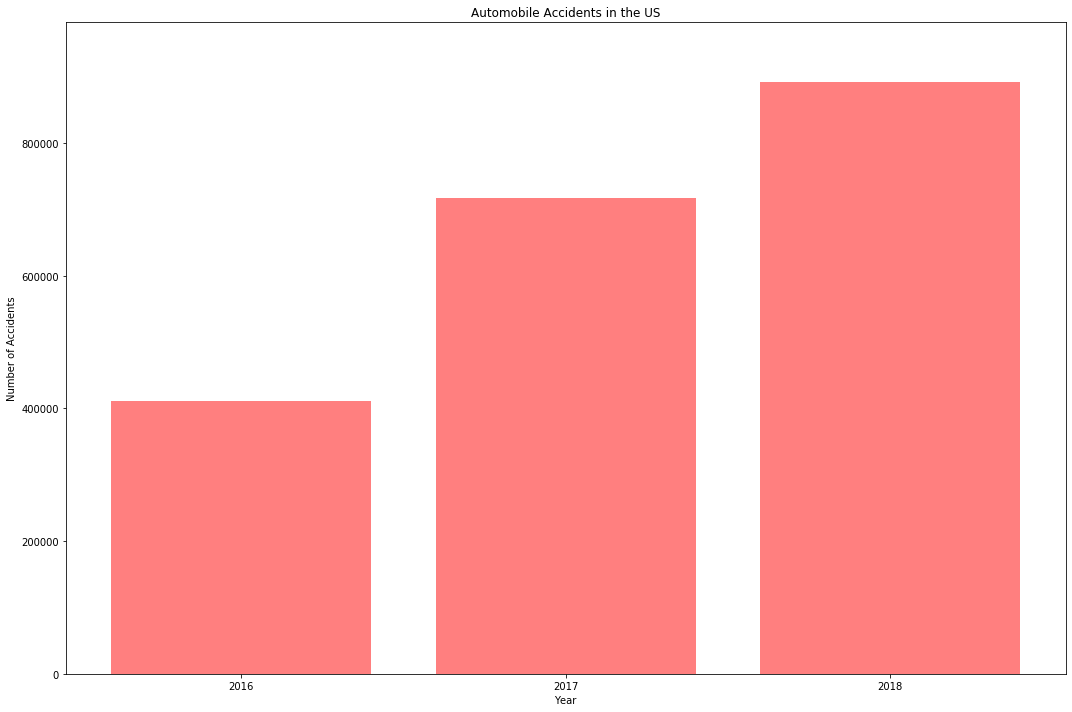

In [99]:
dfcl_2015_loc = dfcl_location.loc[dfcl_location["Start_Year"] == "2015", :]
dfcl_2016_loc =  dfcl_location.loc[dfcl_location["Start_Year"] == "2016", :]
dfcl_2017_loc =  dfcl_location.loc[dfcl_location["Start_Year"] == "2017", :]
dfcl_2018_loc =  dfcl_location.loc[dfcl_location["Start_Year"] == "2018", :]
dfcl_2019_loc = dfcl_location.loc[dfcl_location["Start_Year"] == "2019", :]
# dfcl_2015_loc
# dfcl_2016_loc
# dfcl_2017_loc
# dfcl_2018_loc
# dfcl_2019_loc

# dfcl_2019_loc["Start_Month"].value_counts()
# dfcl_2018_loc["Start_Month"].value_counts()
# dfcl_2017_loc["Start_Month"].value_counts()
# dfcl_2016_loc["Start_Month"].value_counts()

#Remove 2015 going forward - only 1 accident.
#Remove 2019 going forward - only goes until April.
total_2016 = len (dfcl_2016_loc)
total_2017 = len (dfcl_2017_loc)
total_2018 = len (dfcl_2018_loc)

years = ["2016", "2017", "2018"]
total_accidents = [total_2016, total_2017, total_2018]

df_annualaccidents = pd.DataFrame ({"Year": years,
                                  "Accidents": total_accidents})

df_annualaccidents
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(15,10))
plt.bar(years, total_accidents, color='r', alpha=0.5, align="center")
plt.xticks(years, years)

# # Set x and y limits
plt.ylim(0, max(total_accidents)*1.1)

# # # Set a Title and labels
plt.title("Automobile Accidents in the US")
plt.xlabel("Year")
plt.ylabel("Number of Accidents")

# # Save our graph and show the graph
plt.tight_layout()
plt.savefig("Outputs/AnnualUSAccidents.png")
plt.show()

###Format chart

In [48]:
#Accidents by State, Timezone in 2017

#Most Frequent Accident States, Timezones in 2017

#Create timezone dictionary




2018    892624
2017    717490
2016    410601
2019    223223
2015         1
Name: Start_Year, dtype: int64

In [ ]:
#Accidents by City, County in 2017



###drill down to ca if data is available

In [ ]:
#time of month for all years (2016 to 2018)
#time of hour for all years
#time of hour for all months
#time of hour for all months, years

In [83]:
###Severity###

,ID,Severity,Start_Year,Start_Month,Start_Hr,City,County,State,Timezone
512229,A-512230,3,2019,03,09,Westfield,Chautauqua,NY,US/Eastern
512230,A-512231,3,2019,03,15,Hamburg,Erie,NY,US/Eastern
512231,A-512232,3,2019,03,17,Grand Island,Erie,NY,US/Eastern
512232,A-512233,3,2019,03,17,Niagara Falls,Niagara,NY,US/Eastern
512233,A-512234,2,2019,03,17,Bradford,McKean,PA,US/Eastern
...,...,...,...,...,...,...,...,...,...
2014937,A-2014938,2,2019,01,17,Los Angeles,Los Angeles,CA,US/Pacific
2014938,A-2014939,2,2019,01,17,Los Angeles,Los Angeles,CA,US/Pacific
2014939,A-2014940,3,2019,01,18,Pacoima,Los Angeles,CA,US/Pacific
2035486,A-2035487,4,2019,01,00,Ladson,Charleston,SC,US/Eastern


In [82]:
dfcl_city = dfcl_location[["Start_Year", "City", "ID"]]
count_city = dfcl_city.groupby(['Start_Year', 'City'])["ID"].count()
dfcl_city_year = pd.DataFrame({"Number of Accidents": count_city})
dfcl_city_year = dfcl_city_year.reset_index()

dfcl_2016_city =  dfcl_city_year.loc[dfcl_city_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_city =  dfcl_city_year.loc[dfcl_city_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_city =  dfcl_city_year.loc[dfcl_city_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

# dfcl_2016_city
# dfcl_2017_city
# dfcl_2018_city


In [64]:
# df_bycounty
dfcl_county = dfcl_location[["Start_Year", "County", "ID"]]
count_county = dfcl_county.groupby(['Start_Year', 'County'])["ID"].count()
dfcl_county_year = pd.DataFrame({"Number of Accidents": count_county})
dfcl_county_year = dfcl_county_year.reset_index()
# dfcl_county_year

dfcl_2016_county =  dfcl_county_year.loc[dfcl_county_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_county =  dfcl_county_year.loc[dfcl_county_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_county =  dfcl_county_year.loc[dfcl_county_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

dfcl_2016_county
dfcl_2017_county
dfcl_2018_county



,Start_Year,County,Number of Accidents
3207,2018,Dickey,1
3981,2018,Runnels,1
3270,2018,Estill,1
3884,2018,Pittsburg,1
3839,2018,Palo Pinto,1
...,...,...,...
3815,2018,Orange,19774
4244,2018,Wake,22851
3685,2018,Mecklenburg,27076
3411,2018,Harris,27116


In [78]:
# df_bystate
dfcl_state = dfcl_location[["Start_Year", "State", "ID"]]
count_state = dfcl_state.groupby(['Start_Year', 'State'])["ID"].count()
dfcl_state_year = pd.DataFrame({"Number of Accidents": count_state})
dfcl_state_year = dfcl_state_year.reset_index()
dfcl_state_year

dfcl_2016_state =  dfcl_state_year.loc[dfcl_state_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_state =  dfcl_state_year.loc[dfcl_state_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_state =  dfcl_state_year.loc[dfcl_state_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

dfcl_2016_state
dfcl_2017_state
dfcl_2018_state

,Start_Year,State,Number of Accidents
138,2018,SD,13
125,2018,ND,19
123,2018,MT,152
143,2018,VT,188
147,2018,WY,199
110,2018,ID,419
100,2018,AR,597
146,2018,WV,672
118,2018,ME,703
105,2018,DC,951


In [ ]:
### You can link this with driver's license data for 2016 and 17.

In [77]:
# df_bytimezone
dfcl_timezone = dfcl_location[["Start_Year", "Timezone", "ID"]]
count_timezone = dfcl_timezone.groupby(['Start_Year', 'Timezone'])["ID"].count()
dfcl_timezone_year = pd.DataFrame({"Number of Accidents": count_timezone})
dfcl_timezone_year = dfcl_timezone_year.reset_index()
dfcl_timezone_year

dfcl_2016_timezone =  dfcl_timezone_year.loc[dfcl_timezone_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_timezone =  dfcl_timezone_year.loc[dfcl_timezone_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_timezone =  dfcl_timezone_year.loc[dfcl_timezone_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

dfcl_2016_timezone
dfcl_2017_timezone
dfcl_2018_timezone

,Start_Year,Timezone,Number of Accidents
11,2018,US/Mountain,55115
12,2018,US/Pacific,201030
9,2018,US/Central,230197
10,2018,US/Eastern,405183


In [121]:
# df_by month
dfcl_month = dfcl_location[["Start_Year", "Start_Month", "ID"]]
count_month = dfcl_month.groupby('Start_Month')["ID"].count()
dfcl_month = pd.DataFrame({"Number of Accidents": count_month})
dfcl_month = dfcl_month.reset_index()
dfcl_month

dfcl_month_year = dfcl_location[["Start_Year", "Start_Month", "ID"]]
count_monthyear = dfcl_month_year.groupby(['Start_Year', 'Start_Month'])["ID"].count()
dfcl_month_year = pd.DataFrame({"Number of Accidents": count_monthyear})
dfcl_month_year = dfcl_month_year.reset_index()
dfcl_month_year

dfcl_2016_month =  dfcl_month_year.loc[dfcl_month_year["Start_Year"] == "2016", :].sort_values("Number of Accidents")
dfcl_2017_month =  dfcl_month_year.loc[dfcl_month_year["Start_Year"] == "2017", :].sort_values("Number of Accidents")
dfcl_2018_month =  dfcl_month_year.loc[dfcl_month_year["Start_Year"] == "2018", :].sort_values("Number of Accidents")

dfcl_2016_month
dfcl_2017_month
dfcl_2018_month

,Start_Year,Start_Month,Number of Accidents
31,2018,07,65747
30,2018,06,67787
36,2018,12,70208
26,2018,02,71463
28,2018,04,72589
33,2018,09,73283
27,2018,03,74417
25,2018,01,74999
32,2018,08,76381
29,2018,05,76477


In [127]:
# df_by hour
dfcl_hour = dfcl_location[["Start_Year", "Start_Hr", "ID"]]
count_hour = dfcl_hour.groupby('Start_Hr')["ID"].count()
dfcl_hour = pd.DataFrame({"Number of Accidents": count_hour})
dfcl_hour = dfcl_hour.reset_index()
dfcl_hour

dfcl_hour_month = dfcl_location[["Start_Hr", "Start_Month", "ID"]]
count_hourmonth = dfcl_hour_month.groupby(['Start_Month', 'Start_Hr'])["ID"].count()
dfcl_hour_month = pd.DataFrame({"Number of Accidents": count_hourmonth})
dfcl_hour_month = dfcl_hour_month.reset_index()
dfcl_hour_month

dfcl_hour_Jan =  dfcl_hour_month.loc[dfcl_hour_month["Start_Month"] == "01", :].sort_values("Number of Accidents")
dfcl_hour_Feb =  dfcl_hour_month.loc[dfcl_hour_month["Start_Month"] == "02", :].sort_values("Number of Accidents")
dfcl_hour_Mar =  dfcl_hour_month.loc[dfcl_hour_month["Start_Month"] == "03", :].sort_values("Number of Accidents")
dfcl_hour_Mar

,Start_Month,Start_Hr,Number of Accidents
49,03,01,1184
50,03,02,1242
51,03,03,1366
48,03,00,1647
71,03,23,1926
52,03,04,3539
70,03,22,3644
69,03,21,4380
53,03,05,5643
68,03,20,6423


In [108]:
# Where do the most severe accidents occur?  (Heain) - 4
#City
dfcl_severity_2016 = dfcl_2016_loc[["City", "Severity", "ID"]]
count_severity2016 = dfcl_severity_2016.groupby(['City', 'Severity'])["ID"].count()
dfcl_severity_2016 = pd.DataFrame({"Number of Accidents": count_severity2016})
dfcl_severity_2016 = dfcl_severity_2016.reset_index()
dfcl_severity_2016_4 = dfcl_severity_2016.loc[dfcl_severity_2016["Severity"] == 4, :].sort_values("Number of Accidents")

dfcl_severity_2017 = dfcl_2017_loc[["City", "Severity", "ID"]]
count_severity2017 = dfcl_severity_2017.groupby(['City', 'Severity'])["ID"].count()
dfcl_severity_2017 = pd.DataFrame({"Number of Accidents": count_severity2017})
dfcl_severity_2017 = dfcl_severity_2017.reset_index()
dfcl_severity_2017_4 = dfcl_severity_2017.loc[dfcl_severity_2017["Severity"] == 4, :].sort_values("Number of Accidents")

dfcl_severity_2018 = dfcl_2018_loc[["City", "Severity", "ID"]]
count_severity2018 = dfcl_severity_2018.groupby(['City', 'Severity'])["ID"].count()
dfcl_severity_2018 = pd.DataFrame({"Number of Accidents": count_severity2018})
dfcl_severity_2018 = dfcl_severity_2018.reset_index()
dfcl_severity_2018_4 = dfcl_severity_2018.loc[dfcl_severity_2018["Severity"] == 4, :].sort_values("Number of Accidents")

In [ ]:
# Where do the most severe accidents occur?  (Heain) - 4
#County

In [ ]:
# Where do the most severe accidents occur?  (Heain) - 4
#State

In [ ]:
# Where do the most severe accidents occur?  (Heain) - 4
#Timezone

In [ ]:
# When do the most severe accidents occur?  (Heain) - 4
#Month

In [ ]:
# When do the most severe accidents occur?  (Heain) - 4
#Hour

In [ ]:
##Accidents by City, State, County, Timezone
##Drivers by State
##Accident by Month, Time of Day
##Accident by Severity (Cross with locale and time)

In [ ]:
#Visualize - https://towardsdatascience.com/a-complete-guide-to-an-interactive-geographical-map-using-python-f4c5197e23e0

In [ ]:
# IDThis is a unique identifier of the accident record.
# SourceIndicates source of the accident report (i.e. the API which reported the accident.).
# TMCA traffic accident may have a Traffic Message Channel (TMC) code which provides more detailed description of the event.
# SeverityShows the severity of the accident, a number between 1 and 4, where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).
# Start_Time Shows start time of the accident in local time zone.
# End_Time Shows end time of the accident in local time zone.
# Start_LatShows latitude in GPS coordinate of the start point.
# Start_LngShows longitude in GPS coordinate of the start point.
# End_LatShows latitude in GPS coordinate of the end point.
# End_LngShows longitude in GPS coordinate of the end point.
# Distance(mi)The length of the road extent affected by the accident.
# DescriptionShows natural language description of the accident.
# NumberShows the street number in address field.
# StreetShows the street name in address field.
# SideShows the relative side of the street (Right/Left) in address field.
# CityShows the city in address field.
# CountyShows the county in address field.
# StateShows the state in address field.
# ZipcodeShows the zipcode in address field.
# CountryShows the country in address field.
# TimezoneShows timezone based on the location of the accident (eastern, central, etc.).
# Airport_CodeDenotes an airport-based weather station which is the closest one to location of the accident.
# Weather_TimestampShows the time-stamp of weather observation record (in local time).
# Temperature(F)Shows the temperature (in Fahrenheit).
# Wind_Chill(F)Shows the wind chill (in Fahrenheit).
# Humidity(%)Shows the humidity (in percentage).
# Pressure(in)Shows the air pressure (in inches).
# Visibility(mi)Shows visibility (in miles).
# Wind_DirectionShows wind direction.
# Wind_Speed(mph)Shows wind speed (in miles per hour).
# Precipitation(in)Shows precipitation amount in inches, if there is any.
# Weather_ConditionShows the weather condition (rain, snow, thunderstorm, fog, etc.)
# AmenityA POI annotation which indicates presence of amenity in a nearby location.
# BumpA POI annotation which indicates presence of speed bump or hump in a nearby location.
# CrossingA POI annotation which indicates presence of crossing in a nearby location.
# Give_WayA POI annotation which indicates presence of give_way in a nearby location.
# JunctionA POI annotation which indicates presence of junction in a nearby location.
# No_ExitA POI annotation which indicates presence of no_exit in a nearby location.
# RailwayA POI annotation which indicates presence of railway in a nearby location.
# RoundaboutA POI annotation which indicates presence of roundabout in a nearby location.
# StationA POI annotation which indicates presence of station in a nearby location.
# StopA POI annotation which indicates presence of stop in a nearby location.
# Traffic_CalmingA POI annotation which indicates presence of traffic_calming in a nearby location.
# Traffic_SignalA POI annotation which indicates presence of traffic_signal in a nearby location.
# Turning_LoopA POI annotation which indicates presence of turning_loop in a nearby location.
# Sunrise_SunsetShows the period of day (i.e. day or night) based on sunrise/sunset.
# Civil_TwilightShows the period of day (i.e. day or night) based on civil twilight.
# Nautical_TwilightShows the period of day (i.e. day or night) based on nautical twilight.
# Astronomical_TwilightShows the period of day (i.e. day or night) based on astronomical twilight.